**Project: Fetal Health Classification**

**Adm No: 148454**

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize

In [29]:
#loading the data
df = pd.read_csv('fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


### Data Understanding

In [30]:
#Number of rows and columns
df.shape

(2126, 22)

- The data has 2126 rows and 22 columns

In [31]:
#checking the data types present in the dataset
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

- The dataset only contains numerical values

In [32]:
# checking for missing values in the dataset
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

- The dataset does not contain any missing values

### **2.Our objective will be to distinguish subjects with normal fetal status from the rest. What should we do in the data set?**


**1 - Normal; 2 - Suspect; 3 - Pathological**

Since our task is to select a machine learning algorithm for the dataset, two main challenges may arise:
- Bad Algorithm 
- Bad Data

Hence, we need to make sure the training data is representative of the new cases of normal, suspect and pathological fetal status'. 
- Checking data quality, dealing with outliers and missing values.
- Conducting feature selection to select relevant features. 
- Avoiding overffiting or underfitting the training data 

Note:
We already have insufficient training data i.e 2126 obseravation and the optimal number is a minimum of 10,000 observations


### **3.Now analyze the data and do the pre-processing that you consider appropriate. It is requested here to analyze the data incorporating medical knowledge (in case you have) to detect possible outliers, possible incoherent values, etc. Consider the use of seaborn’s pairplot function (sns.pairplot()) to tackle groups of variables in one go (although probably not all the dataset at once)**

baseline value                                               Axes(0.125,0.786098;0.133621x0.0939024)
accelerations                                             Axes(0.285345,0.786098;0.133621x0.0939024)
fetal_movement                                             Axes(0.44569,0.786098;0.133621x0.0939024)
uterine_contractions                                      Axes(0.606034,0.786098;0.133621x0.0939024)
light_decelerations                                       Axes(0.766379,0.786098;0.133621x0.0939024)
severe_decelerations                                         Axes(0.125,0.673415;0.133621x0.0939024)
prolongued_decelerations                                  Axes(0.285345,0.673415;0.133621x0.0939024)
abnormal_short_term_variability                            Axes(0.44569,0.673415;0.133621x0.0939024)
mean_value_of_short_term_variability                      Axes(0.606034,0.673415;0.133621x0.0939024)
percentage_of_time_with_abnormal_long_term_variability    Axes(0.766379,0.673415;0.133621x0

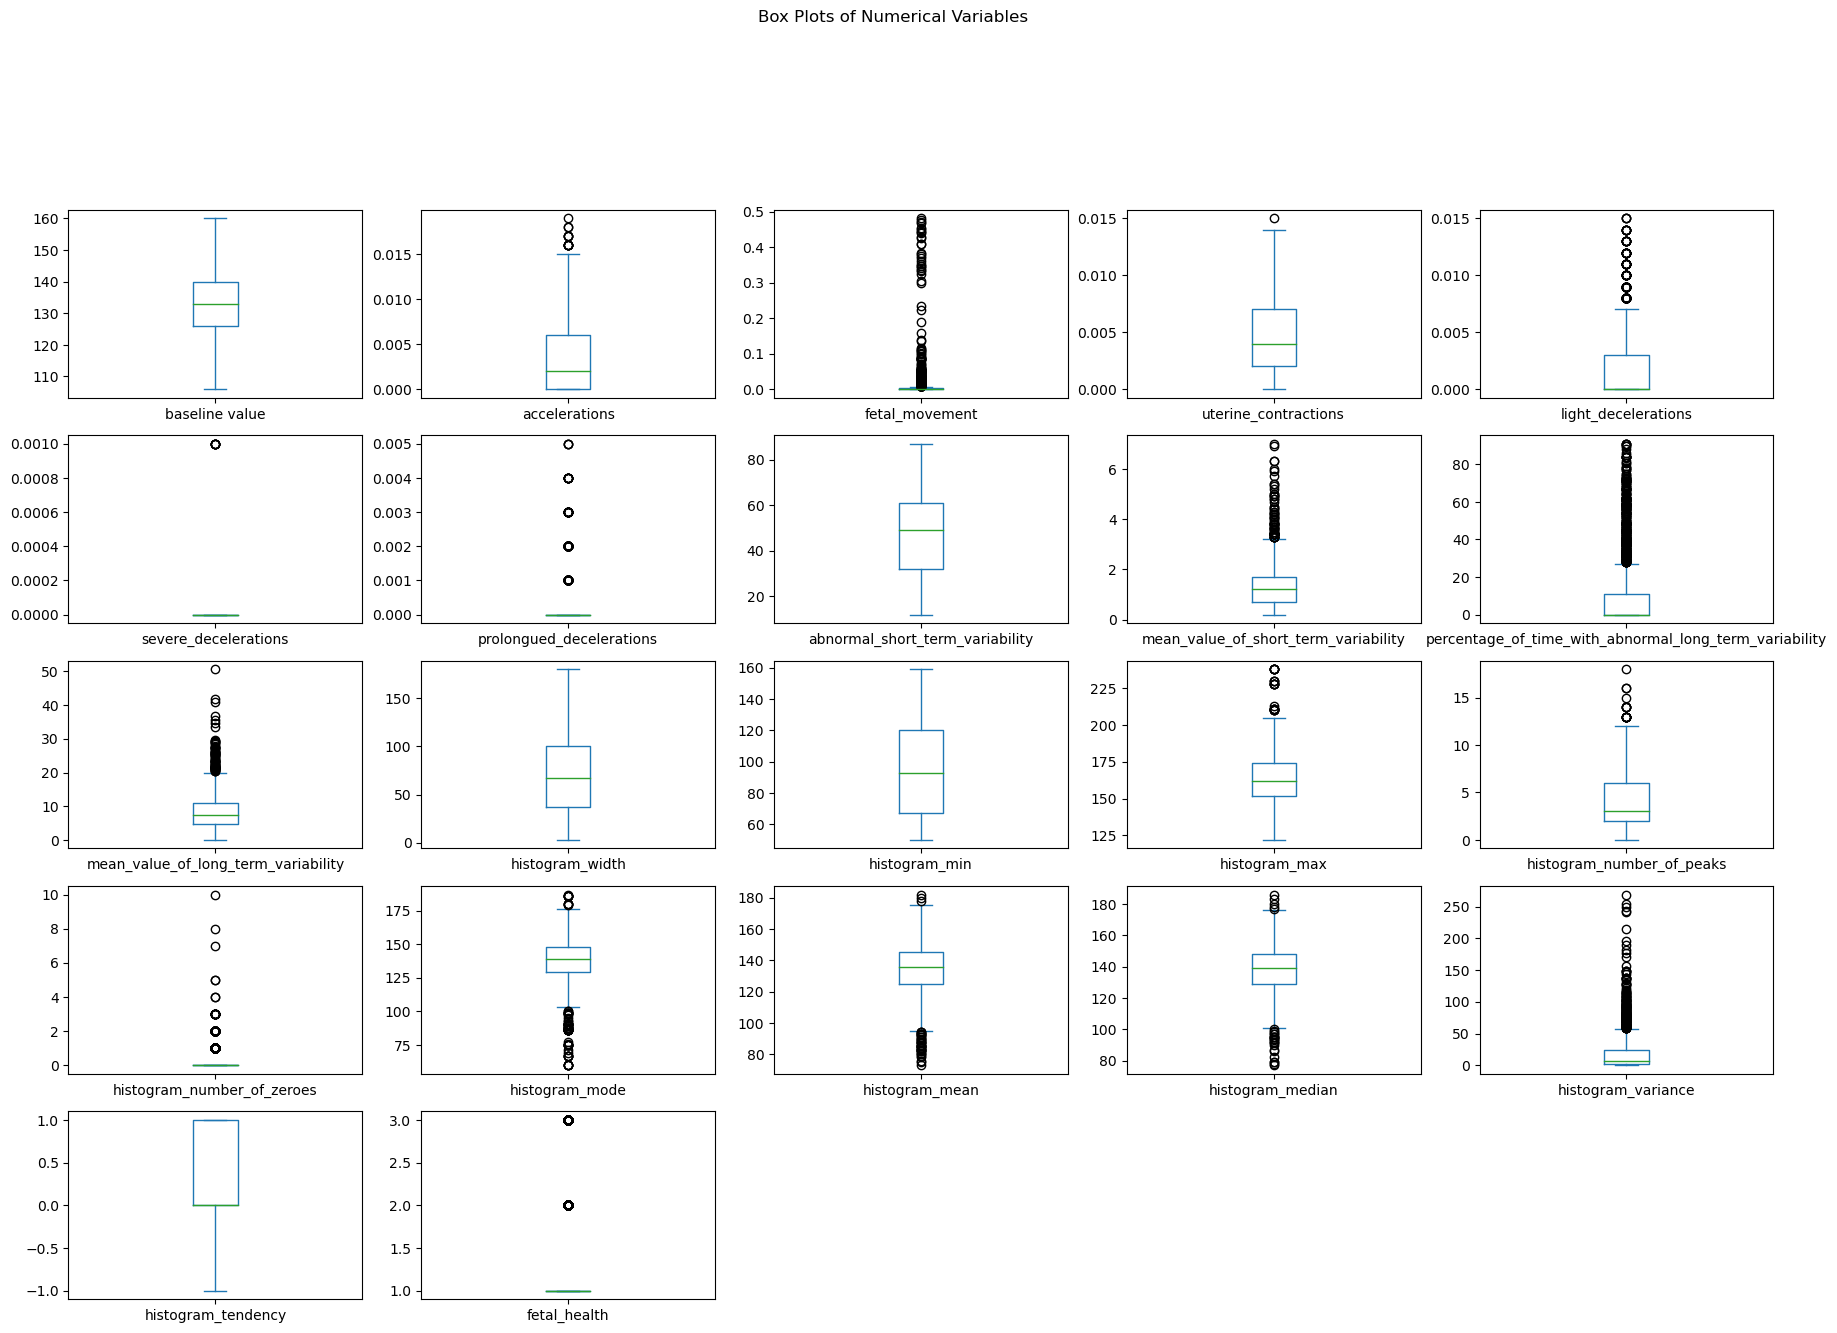

In [40]:
df.plot(kind="box", subplots=True, layout=(7,5), figsize=(22,20), title="Box Plots of Numerical Variables" )

**Insights:**
- Based on the boxplots above, most variables seem to have outliers. However most outliers might be as a result of an abnormal fetal Health. Hence we will retain them.

c:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


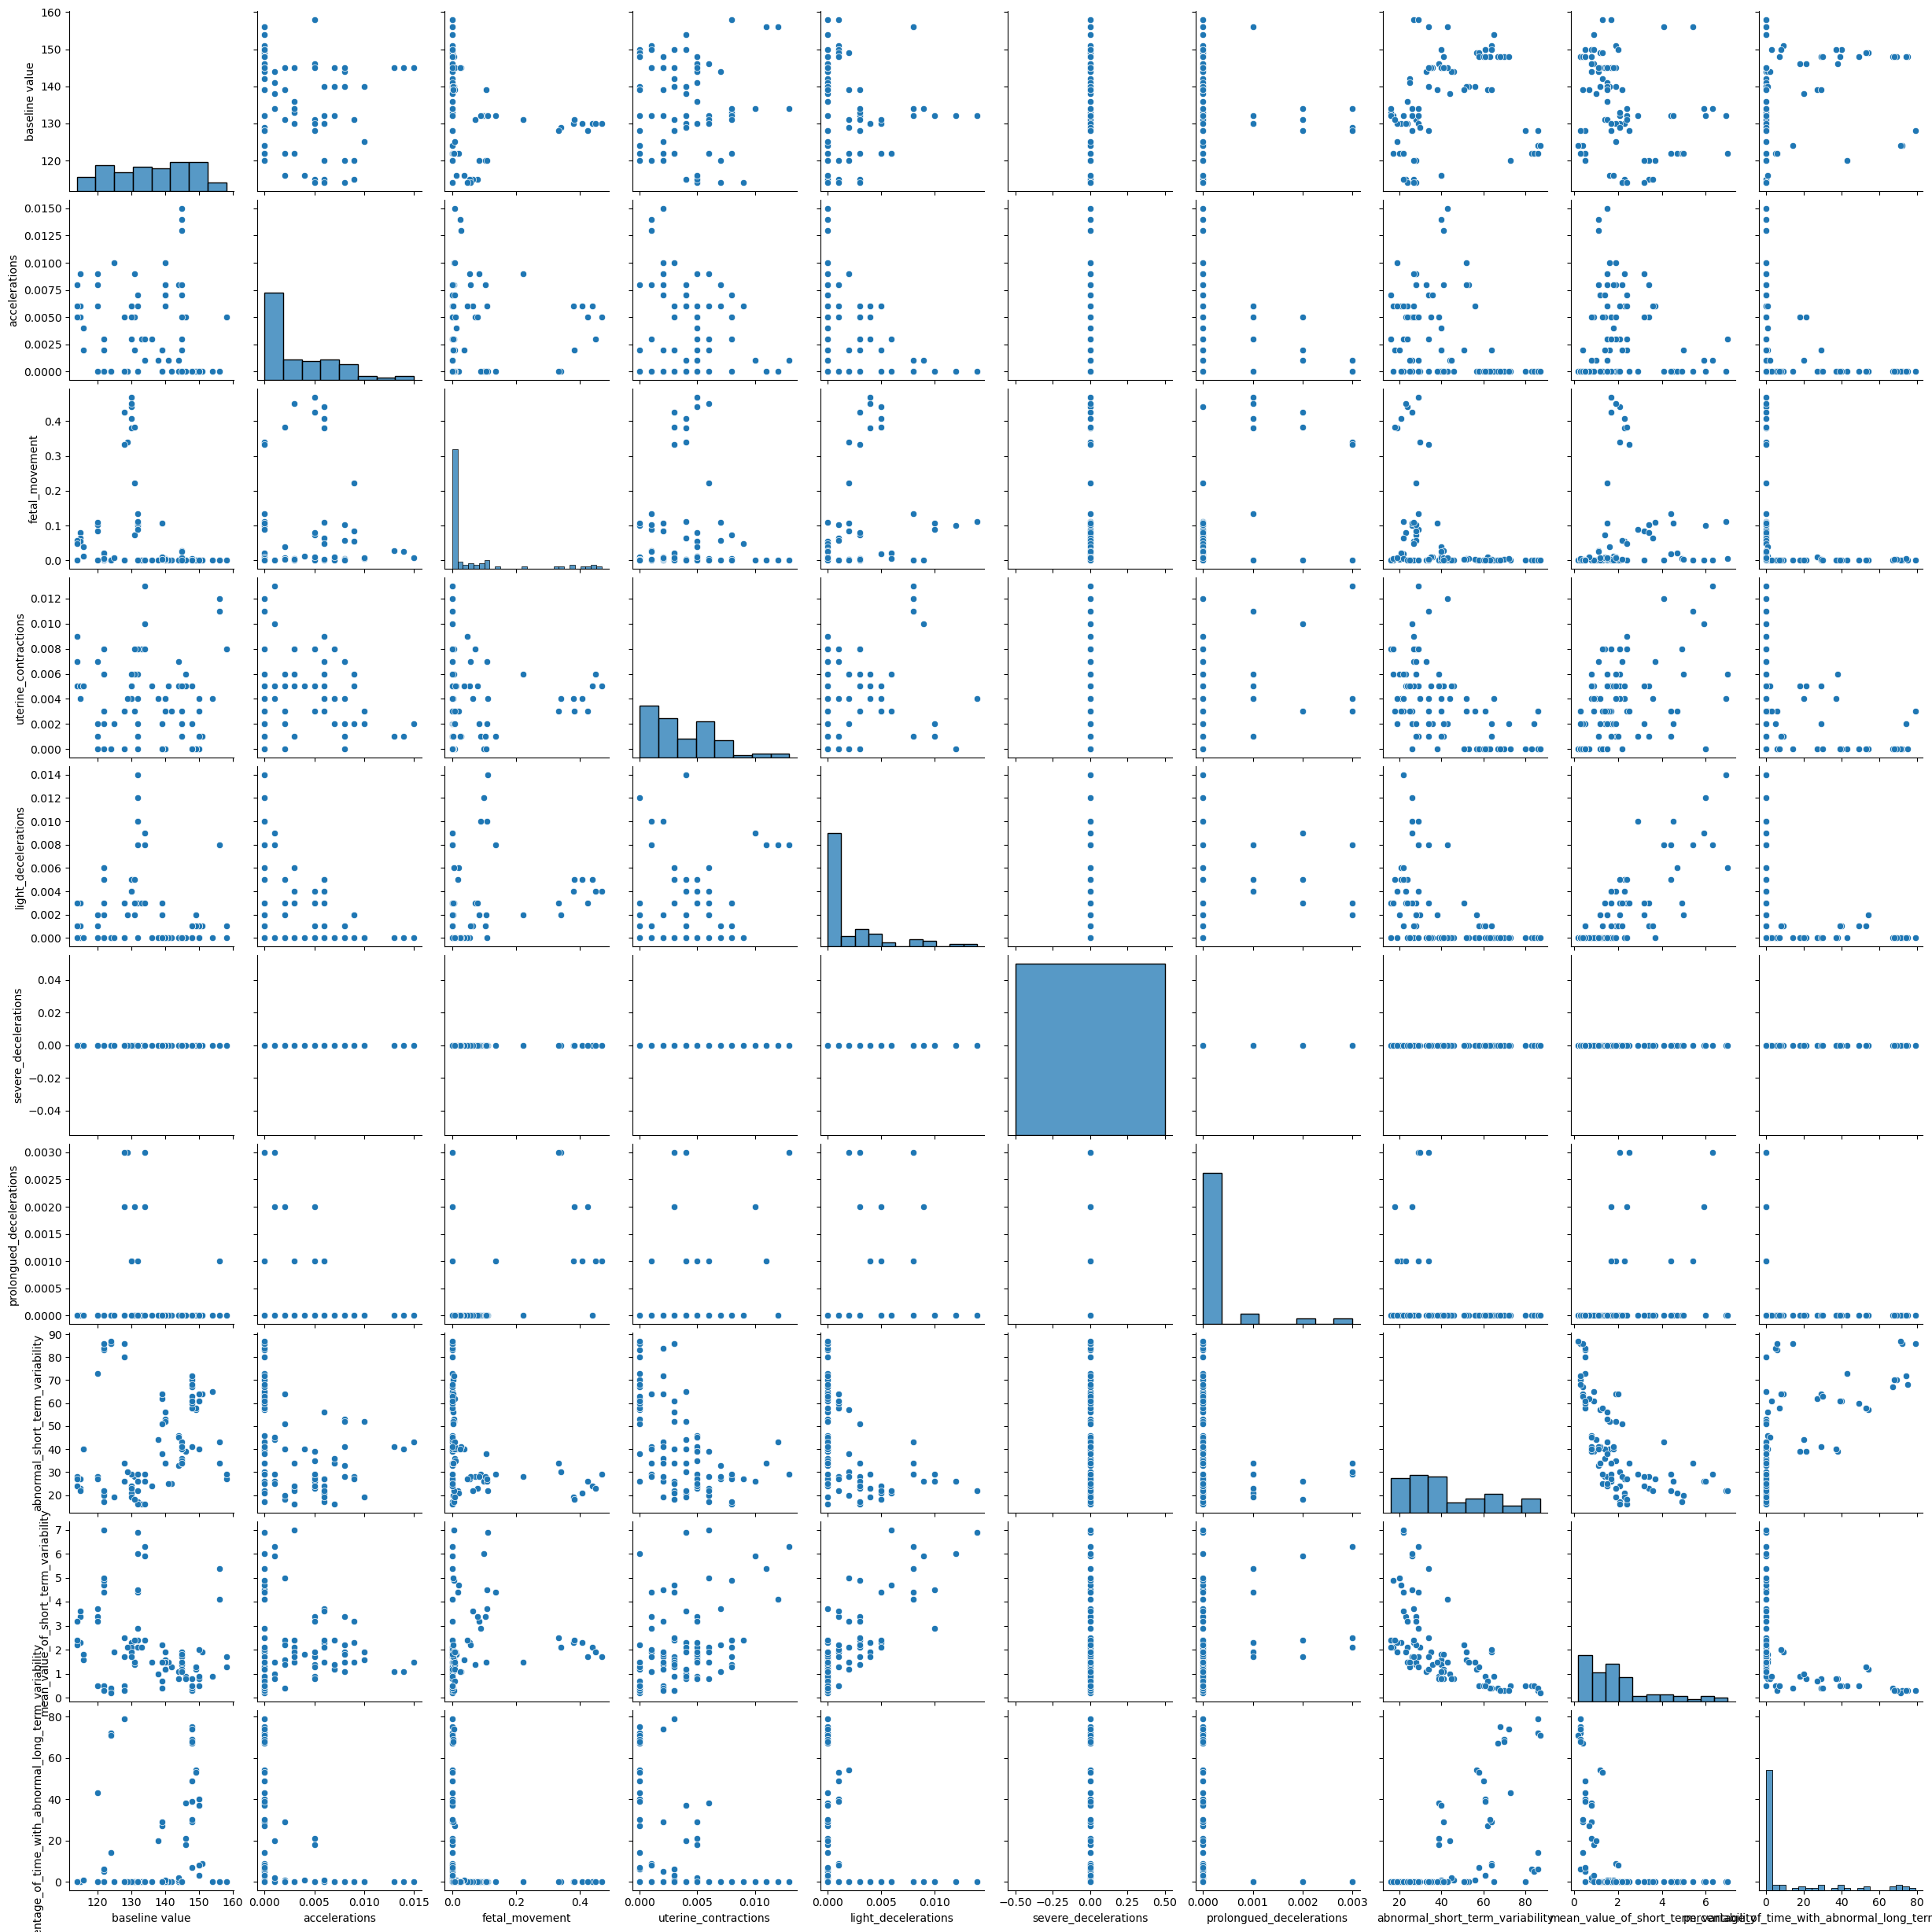

In [41]:
# attain the first 100 record and plot a pairplot
df_subset = df.iloc[:100,:10]

# create pairplot
sns.pairplot(df_subset)
plt.show()

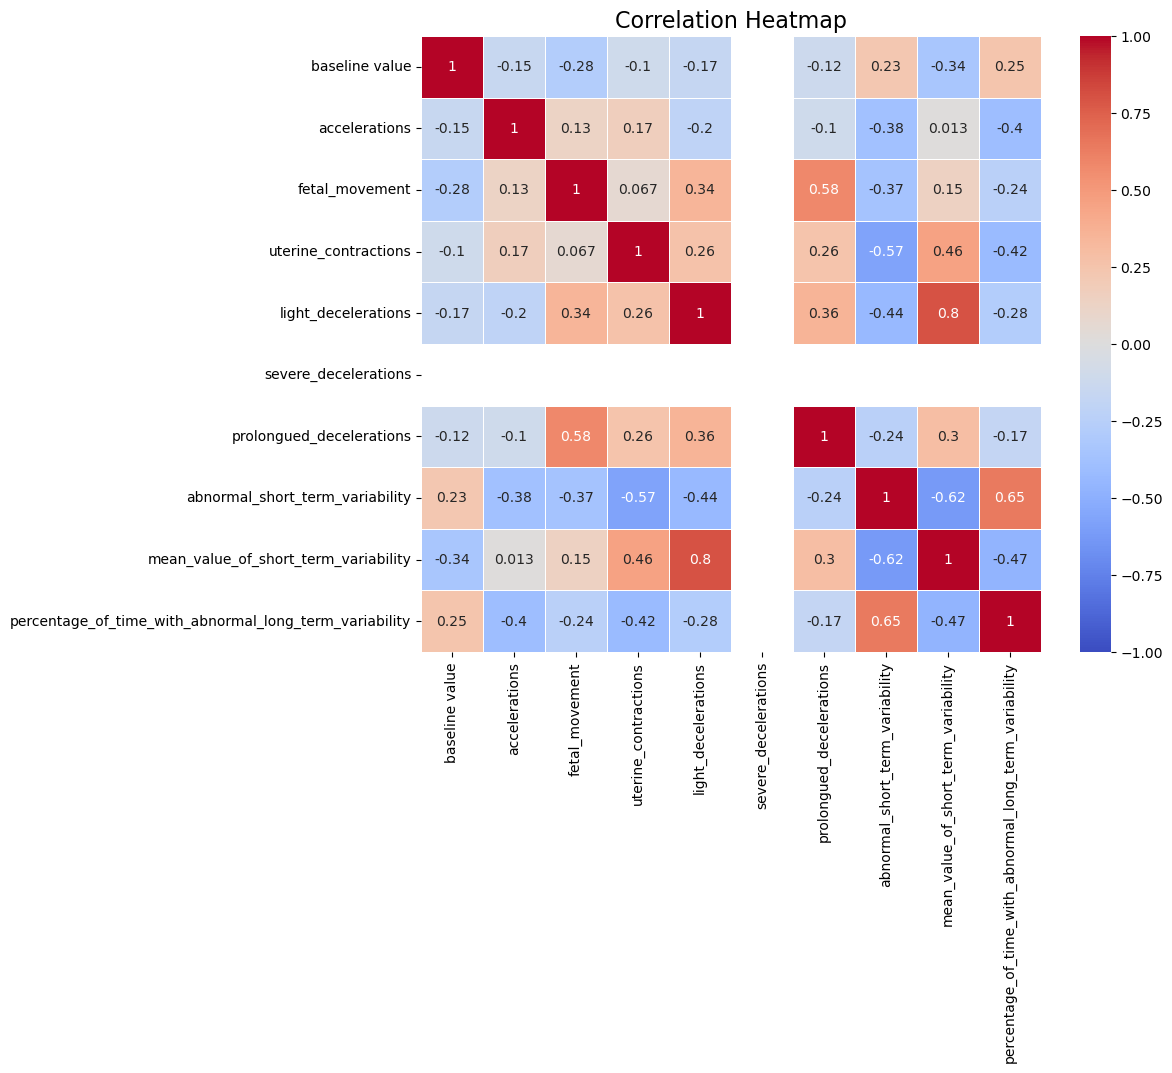

In [45]:
# Correlation matrix 
correlation_matrix = df_subset.select_dtypes(include=[np.number]).corr()

# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

# Setting the title
plt.title('Correlation Heatmap', size=16)

# Showing the plot
plt.show()

**Insights:**

1.Strong Positive Relationships:

- Prolonged decelerations are strongly linked to fetal movement and abnormal short-term variability.
- Abnormal short-term variability is strongly related to the percentage of time with abnormal long-term variability.

2.Moderate Positive Relationships:

- Uterine contractions increase alongside short-term variability.
- Uterine contractions are also related to light decelerations.

3.Strong Negative Relationships:

- Uterine contractions reduce abnormal short-term variability.
- Higher short-term variability is linked to lower abnormal short-term variability.

4.Other Notes:
- Baseline values and percentage of time with abnormal long-term variability have a mild positive relationship.
 -More accelerations reduce abnormal short-term variability.

c:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


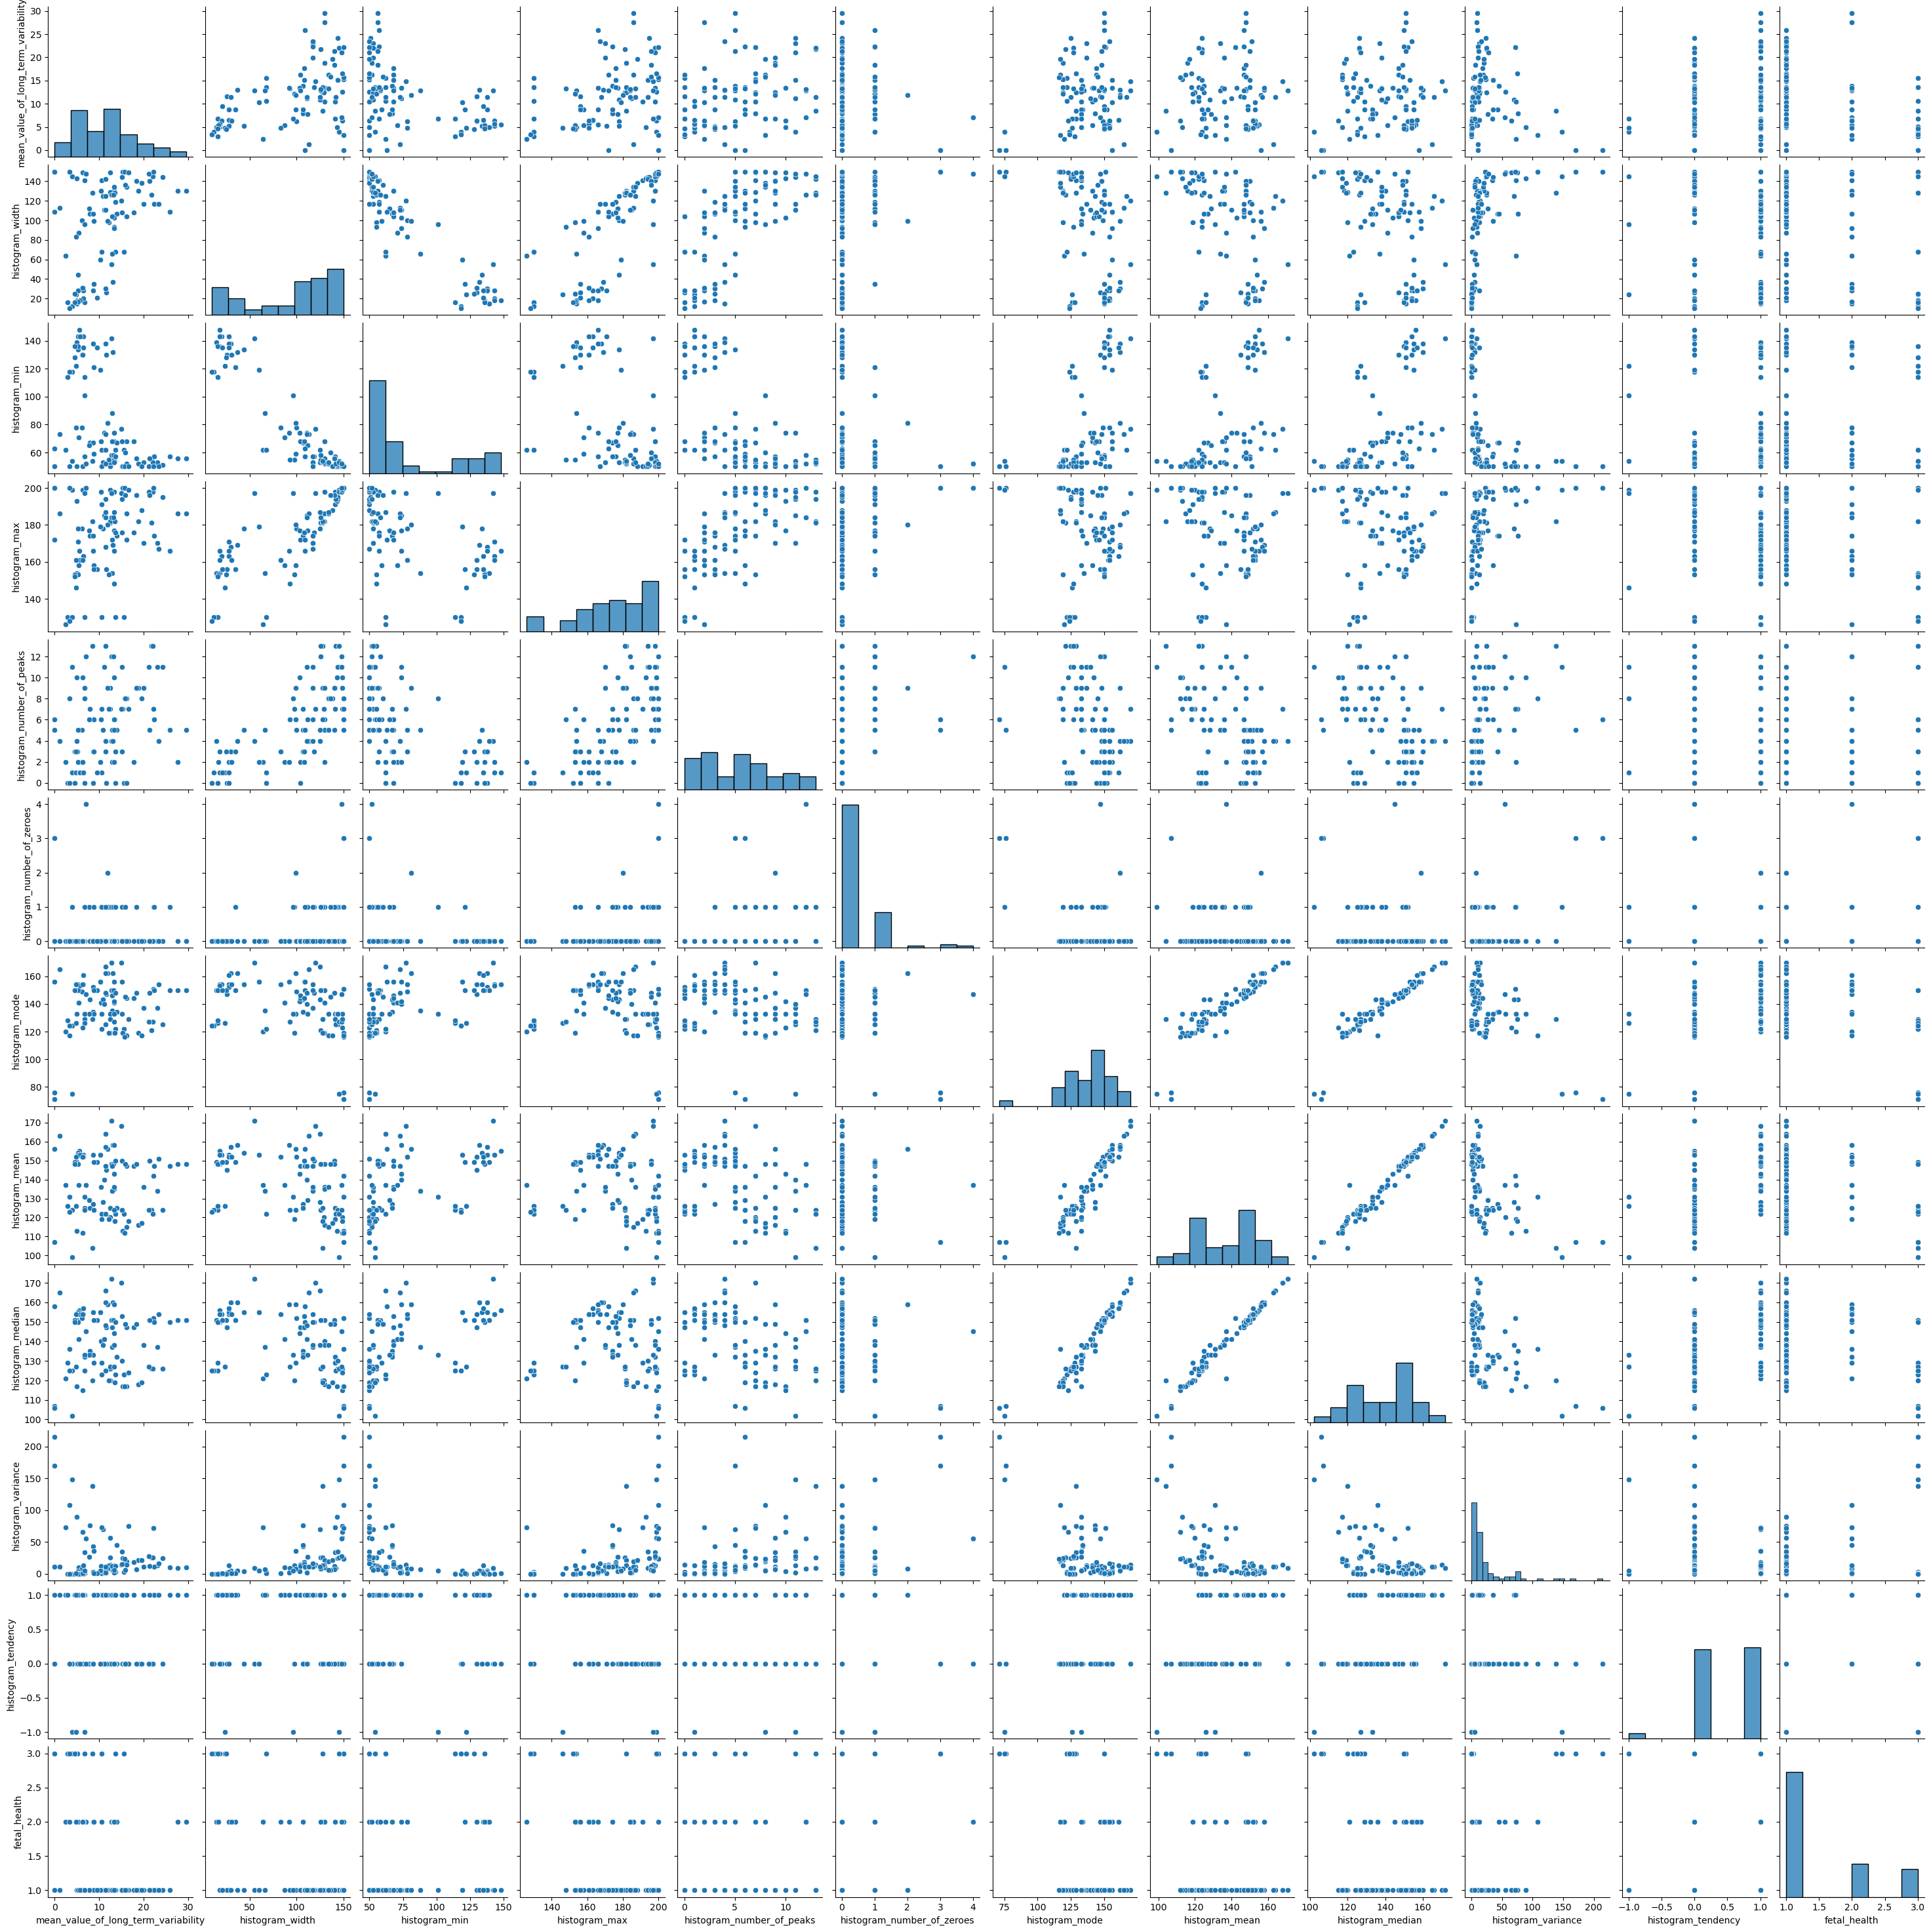

In [42]:
# Taking the next 10 variables
df_subset_ten = df.iloc[:100, 10:]

# Create pairplot
sns.pairplot(df_subset_ten)
plt.show()


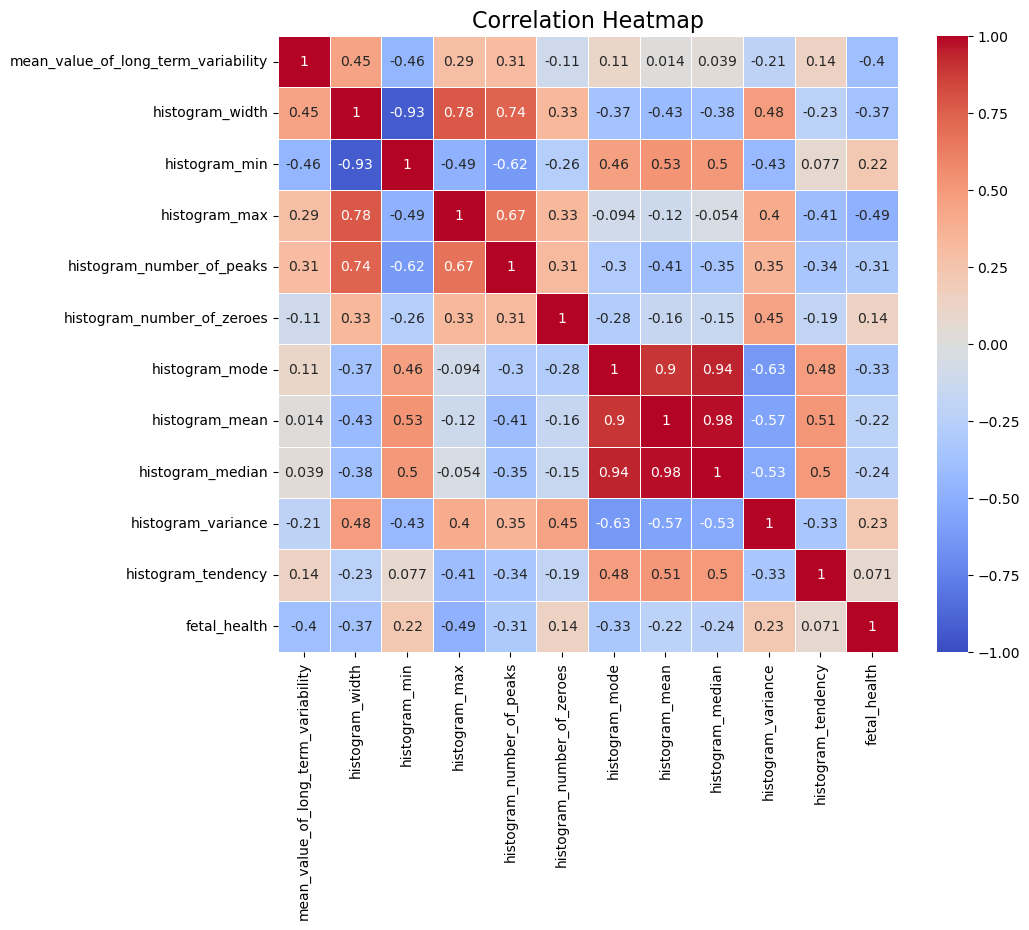

In [46]:
# Correlation matrix 
correlation_matrix = df_subset_ten.select_dtypes(include=[np.number]).corr()

# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

# Setting the title
plt.title('Correlation Heatmap', size=16)

# Showing the plot
plt.show()

**Insights:**

1.Positive Relationships:

- Histogram mean, median, and mode are highly correlated with each other, indicating a strong relationship between these central tendency measures.
- Histogram width is positively related to histogram max and mean value of long-term variability.
- Histogram number of peaks has a moderate positive relationship with histogram max and mean value of long-term variability.

2.Negative Relationships:

- Histogram width has a strong negative correlation with histogram min.
- Fetal health is negatively correlated with mean value of long-term variability, histogram width, and histogram max — meaning that as these values increase, fetal health decreases.
- Histogram mode is negatively correlated with histogram variance and histogram min.

3.Fetal Health:

Fetal health is most negatively impacted by mean value of long-term variability, histogram width, histogram max, and histogram min.

### **4.Is this an unbalanced problem?**

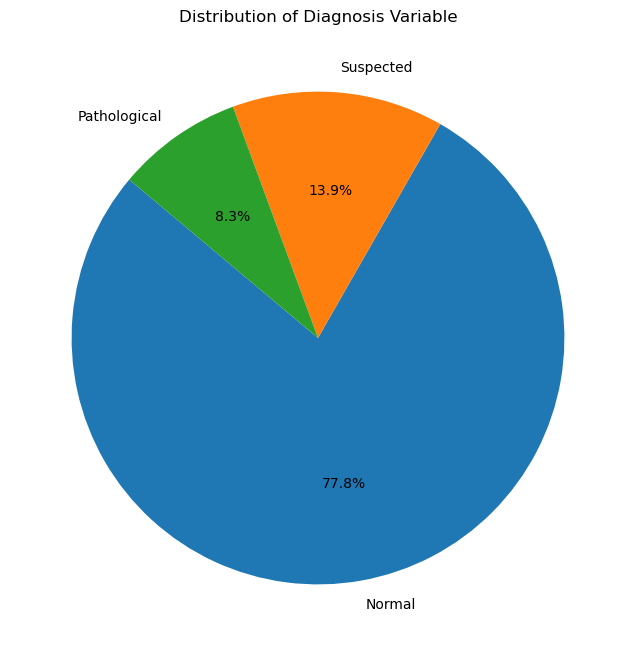

In [33]:
categorical_counts = df['fetal_health'].value_counts()
categorical_labels = {1: 'Normal', 2: 'Suspected', 3: 'Pathological'}
categorical_counts.index = categorical_counts.index.map(categorical_labels)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(categorical_counts, labels=categorical_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Diagnosis Variable')
plt.show()


Insight:
- The dataset is imbalanced, since Normal class is the majority class while the suspected and pathological are the minority classes.

### **5.Apply normalization on the dataframe if necessary and divide the available examples into 80% for training and 20% for testing, randomly. What code have you applied?**

In [34]:
# Normalization
X = df.drop(columns=['fetal_health'])  # Features
y = df['fetal_health']  # Target variable

# Normalize the feature variables
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42, stratify=y)

### **6.Train a Random Forest (RF) model by adjusting the number of trees to 100, 300 and 1000. Use 5-fold CV and choose the number of trees that obtains the best balanced accuracy?**

In [35]:
# number of trees to test
n_trees = [100, 300, 1000]

#  variables to store the best number of trees and best balanced accuracy
best_n = None
best_balanced_accuracy = 0

for n in n_trees:
    # Initializing the Random Forest model
    rf_model = RandomForestClassifier(n_estimators=n, random_state=42)
    
    # Perform 5-fold cross-validation and calculate balanced accuracy
    scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='balanced_accuracy')
    
    # Calculate the mean balanced accuracy
    mean_balanced_accuracy = scores.mean()
    
    # Print the results for each number of trees
    print(f'Number of trees: {n}, Mean Balanced Accuracy (5-fold CV): {mean_balanced_accuracy:.4f}')
    
    # Update the best number of trees if the current model performs better
    if mean_balanced_accuracy > best_balanced_accuracy:
        best_balanced_accuracy = mean_balanced_accuracy
        best_n = n

# Step 4: Print the best number of trees and the corresponding balanced accuracy
print(f'\nBest number of trees: {best_n}, Best Mean Balanced Accuracy: {best_balanced_accuracy:.4f}')

Number of trees: 100, Mean Balanced Accuracy (5-fold CV): 0.8757
Number of trees: 300, Mean Balanced Accuracy (5-fold CV): 0.8715
Number of trees: 1000, Mean Balanced Accuracy (5-fold CV): 0.8710

Best number of trees: 100, Best Mean Balanced Accuracy: 0.8757


### **7.Comparing the results obtained with the three models, does it fit with what you expected to obtain?**

Insights:
- 100 trees was found to be the best configuration because it gave the highest balanced accuracy (0.8757) compared to models with 300 or 1000 trees.

- Efficiency: Since the model with 100 trees performed best, you can use this configuration for future predictions, which is beneficial because fewer trees mean faster training and prediction times.

- Diminishing Returns: Increasing the number of trees to 300 and 1000 did not improve the balanced accuracy. This shows diminishing returns, where adding more trees does not lead to significant performance gains but may increase computational cost.

- Model Complexity: More complex models (with more trees) may not always generalize better. In this case, the simpler model (with 100 trees) performed better, which might suggest the model is already capturing the important patterns without needing additional trees.

### **8.Now evaluate the chosen model on the test data. What metric value do you get? Does the model generalize well?**

In [36]:
# Initializing the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# prediction on test set
y_pred = rf_model.predict(X_test)

# Evaluating the model using Balanced Accuracy on the test data
test_balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f'Balanced Accuracy on test data: {test_balanced_accuracy:.4f}')

Balanced Accuracy on test data: 0.8380


Insights:
- The balanced accuracy of 0.8380 indicates that the model correctly classified about 83.8% of the samples on average, considering both the majority and minority classes equally.
- The balanced accuracy on the training data during 5-fold cross-validation (with 100 trees) was 0.8757.
- The drop to 0.8380 on the test data indicates a decrease of around 0.0377 (3.77%). However, the model generalizes well.


### **9.We will now train a Gradient Boosting Trees model using 5-fold CV. We will consider the default parameters and we will only vary the number of estimators (100 and 200) and the learning rate (0.01, 0.1 and 1). Which model obtains better balanced accuracy?**

In [37]:
#  parameter grids
n_estimators = [100, 200]
learning_rates = [0.01, 0.1, 1]

best_balanced_accuracy = 0
best_params = {}

# Iterate over the different combinations of estimators and learning rates
for n in n_estimators:
    for lr in learning_rates:
        # Initialize the Gradient Boosting model with current parameters
        gbc_model = GradientBoostingClassifier(n_estimators=n, learning_rate=lr, random_state=42)
        
        # Perform 5-fold cross-validation
        scores = cross_val_score(gbc_model, X_train, y_train, cv=5, scoring='balanced_accuracy')
        
        # Calculate the mean balanced accuracy
        mean_balanced_accuracy = scores.mean()
        print(f'n_estimators: {n}, learning_rate: {lr}, Mean Balanced Accuracy (5-fold CV): {mean_balanced_accuracy:.4f}')
        
        # Update best model if current model performs better
        if mean_balanced_accuracy > best_balanced_accuracy:
            best_balanced_accuracy = mean_balanced_accuracy
            best_params = {'n_estimators': n, 'learning_rate': lr}

# Output the best performing model
print(f'\nBest model -> n_estimators: {best_params["n_estimators"]}, learning_rate: {best_params["learning_rate"]}, Best Balanced Accuracy: {best_balanced_accuracy:.4f}')

n_estimators: 100, learning_rate: 0.01, Mean Balanced Accuracy (5-fold CV): 0.8289
n_estimators: 100, learning_rate: 0.1, Mean Balanced Accuracy (5-fold CV): 0.9043
n_estimators: 100, learning_rate: 1, Mean Balanced Accuracy (5-fold CV): 0.8745
n_estimators: 200, learning_rate: 0.01, Mean Balanced Accuracy (5-fold CV): 0.8616
n_estimators: 200, learning_rate: 0.1, Mean Balanced Accuracy (5-fold CV): 0.9095
n_estimators: 200, learning_rate: 1, Mean Balanced Accuracy (5-fold CV): 0.8777

Best model -> n_estimators: 200, learning_rate: 0.1, Best Balanced Accuracy: 0.9095


Insights:
- The combination of 200 estimators and a learning rate of 0.1 provided the highest balanced accuracy among all tested models.
- This indicates that this model is likely well-tuned to the data and has learned to balance the prediction for both classes effectively.

### **10.Analyze how the results obtained are modified depending on the two parameters tested. Does it fit with what should be expected?**

Insights:

- Impact of n_estimators:
The model with 200 trees performed slightly better than the model with 100 trees, but the difference is not dramatic, especially with the learning rate of 0.1. This matches the expectation that while more trees can help, they don’t always lead to large improvements once the model reaches a sufficient level of performance.

- Impact of Learning Rate:
As expected, the learning rate of 0.1 yielded the best results across the board, balancing between learning speed and stability. The low learning rate required more trees to perform well, and the high learning rate degraded performance.

- Optimal Combination:
The best combination of 200 trees and a learning rate of 0.1 produced the highest balanced accuracy (0.9097). This is consistent with general best practices, where moderate learning rates tend to work well, especially when paired with an appropriate number of trees.

### **11.With the best set of parameters selected, evaluate the model on the test data. Does it generalize well in this case?**

In [38]:
gbc_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)

# Train the model on the entire training data
gbc_model.fit(X_train, y_train)

# Evaluation of the model on the test data
y_test_pred = gbc_model.predict(X_test) 

# Calculating Balanced Accuracy
balanced_acc_test = balanced_accuracy_score(y_test, y_test_pred)

print(f'Balanced Accuracy on test data: {balanced_acc_test:.4f}')

Balanced Accuracy on test data: 0.8663


Insights:
- Overall, while the model demonstrates good performance with a balanced accuracy of 0.8663 on the test data, the significant drop from the training performance indicates potential overfitting. Further investigation into model performance and tuning may help improve its generalization to unseen data.


### **12.Finally, obtain both the ROC curve of the model and the area under the curve. At what point of the ROC curve would you work if you had to apply it in practice? Justify your answer.**

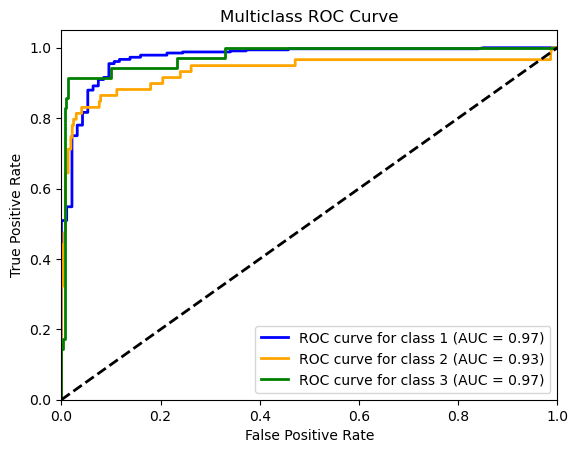

In [49]:
# Binarize the output correctly for classes 1, 2, 3
y_test_bin = label_binarize(y_test, classes=[1, 2, 3])  # Corrected this line
n_classes = y_test_bin.shape[1]

# Fit the model on test data (assuming model is already trained)
y_score = gbc_model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'orange', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve for class {i+1} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Dashed diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.show()


**Insights:**
- The AUC for each class provides a single metric to evaluate the overall performance of the model for that class. A higher AUC indicates better performance. In the provided image, the AUC values for class 1, class 2, and class 3 are 0.97, 0.93, and 0.98, respectively.

Choosing a Point on the ROC Curve:
The point on the ROC curve where you would work in practice depends on the specific trade-off between TPR and FPR that you are willing to accept. For instance:

- Prioritizing minimizing false positives: Choosing a point on the curve with a low FPR, even if it means sacrificing some TPR.

- Prioritizing maximizing true positives: Choosing a point on the curve with a high TPR, even if it means accepting more false positives.

- In general, a good point to choose is one that balances TPR and FPR based on the specific requirements of your application. For instance, if we are working on a medical diagnosis problem where false positives can have serious consequences, we might choose a point with a lower FPR. On the other hand, if we are working on a recommendation system where false positives are less critical, we might choose a point with a higher TPR.

- The choice of the optimal point on the ROC curve depends on the specific trade-off between TPR and FPR that is acceptable for your application.